<h1>CSIS_3290_Term Project</h1>
<h2>Project - White Wine Quality Prediction</h2>
<h3>Name : Vinod Kumar Nethi Chinna</h3>
<h3>Student_ID : 300304630</h3>


# Introduction 

This project is about predicting the quality of wine. dataset is downloaded from the link 
https://www.kaggle.com/maitree/wine-quality-selection. This data set contains 11 features of wine namely
(fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 
 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality).
 
Quality is the target column and rest all attributes can be treated as features. Based on the values of feature columns we will
build Machine Learning classification model to predict the quality of wine.
 
# uses of this project.
 
 - This model can determine the quality of wine based on various attributes.
 - This will help restaurants and lounges to decide best quality wine among various options available in market.
 - Maintaining high quality wine collection will sure attract customers and business can be developed for restaurants and hotels.
 - This will help individual who drinks wine a lot and looking for better wines to choose high quality wine. 
 - Wine Manufacturers can decide what effects their wine quality and necessary steps can be taken to ensure the quality 
   and achieve customer satisfaction.
 - Price can be determined based on quality by wine manufacturer and sellers.
 
# summary of code development.
 
 Changes have been done to data (i.e data is not evenly distributed among target classes,so classes with low records are 
 merged with other classes. initially we have 7 categories after modification we have 5 classes now.)
 
 variance threshold feature selection method is used.Pipeline is used for scaling the features and fit the training data to 
 model.Model which gives best accuracy is selected and test data is predicted. Scaling the features dont improve model always.
 model can perform better without scaling also. i have tested both ways(with & without scaling) and observed similar accuracy of
 models. after choosing the model with higher accuracy (i,e XGB Classifier) i used RandomizedSearchCV to find out the best 
 hyper parameters and tuned the model for better accuracy.(if we increase the estimators or further tune the parameters ,data   is overfitting so after trying all combinations best parameters are taken). once we have tuned model then we will predict the test dataset and observed various metrics like confusion matrix and classification report. finally out of sample predictions are predicted with model.
 
 
# References
     XGBoost - https://dataaspirant.com/xgboost-algorithm/ 
     Class lectures, Labs
     
     
 
 

In [77]:
#Importing required libraries.

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

import xgboost
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [78]:
#Reading the input data, for easy access data files are stored in git and accessed here.

data = pd.read_csv('https://raw.githubusercontent.com/vinodnethichinna/MachineLearning_CSIS3290/master/TermProject_DataFiles/winequality-white.csv')



In [79]:
# using shape to determine number of rows and columns.
    
data.shape

(4898, 12)

In [80]:
#peeking at the data.

data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [81]:
#check for null values if any.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [82]:
#checking the dataset is biased or not.

data.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [83]:
# data is biased and not evenly distributed so changing the labels of dataset as below. 
# data with label 3 is modified as 4 and data with 9 is modified as 8.

data["quality"].replace({3 : 4 , 9 : 8}, inplace=True)

In [84]:
# Checking the count after modification.

data.quality.value_counts()

6    2198
5    1457
7     880
4     183
8     180
Name: quality, dtype: int64

Text(0, 0.5, 'Target Class')

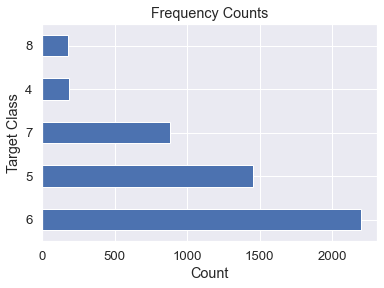

In [85]:
# bar chart showing how many records per category


plt = data['quality'].value_counts().plot(kind='barh')
plt.set_title("Frequency Counts")
plt.set_xlabel("Count")
plt.set_ylabel("Target Class")


By observing the above chart we can conclude most of data is falling in class 6 category. class 4 & 8 has very less number of
records. this may effect our prediction and this data is biased.

In [86]:
# looking at columns of data.

data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [87]:
#Changing column names into standard format.

data.rename(columns = {
                            'fixed acidity' : 'fixed_acidity',
                            'volatile acidity' : 'volatile_acidity',
                            'citric acid' : 'citric_acid',                            
                            'residual sugar'  : 'residual_sugar',
                            'free sulfur dioxide' : 'free_sulfur_dioxide',
                            'total sulfur dioxide' : 'total_sulfur_dioxide'
                          },inplace = True)

In [88]:
# Descriptive statistics of our dataset.

data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.880972
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.871532
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,4.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,8.000000


In [89]:

# Checking for outliers and dropping those columns.
# below are the outliers conditions, we are dropping them because they may effect our model.

data.drop(data.loc[data['fixed_acidity'] >14].index,inplace = True)
data.drop(data.loc[data['residual_sugar'] >40].index,inplace = True)

In [90]:
# Descriptive statistics of our dataset after dropping outliers.

data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000
mean,6.853094,0.278103,0.334105,6.380362,0.045768,35.314134,138.352635,0.994019,3.188233,0.489796,10.513905,5.880923
std,0.837375,0.100336,0.120964,5.000942,0.021848,17.006100,42.504872,0.002922,0.151003,0.114111,1.230727,0.871707
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,4.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,11.800000,1.100000,1.660000,31.600000,0.346000,289.000000,440.000000,1.010300,3.820000,1.080000,14.200000,8.000000


In [91]:
#corelation.

data.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.024421,0.288859,0.090176,0.023695,-0.049188,0.090937,0.271537,-0.429184,-0.018478,-0.122933,-0.113318
volatile_acidity,-0.024421,1.000000,-0.153337,0.048893,0.069048,-0.095258,0.088986,0.006365,-0.033946,-0.038357,0.066710,-0.196670
citric_acid,0.288859,-0.153337,1.000000,0.090578,0.113987,0.094921,0.120879,0.146458,-0.164421,0.061490,-0.076346,-0.009893
residual_sugar,0.090176,0.048893,0.090578,1.000000,0.086758,0.307363,0.406103,0.833956,-0.200269,-0.031221,-0.459423,-0.100356
chlorides,0.023695,0.069048,0.113987,0.086758,1.000000,0.101851,0.198856,0.259302,-0.090847,0.016345,-0.360514,-0.210583
free_sulfur_dioxide,-0.049188,-0.095258,0.094921,0.307363,0.101851,1.000000,0.615870,0.306366,-0.000187,0.059840,-0.249870,0.013438
total_sulfur_dioxide,0.090937,0.088986,0.120879,0.406103,0.198856,0.615870,1.000000,0.541054,0.002204,0.134393,-0.449105,-0.173428
density,0.271537,0.006365,0.146458,0.833956,0.259302,0.306366,0.541054,1.000000,-0.100087,0.070850,-0.801878,-0.317576
pH,-0.429184,-0.033946,-0.164421,-0.200269,-0.090847,-0.000187,0.002204,-0.100087,1.000000,0.155577,0.121231,0.100073
sulphates,-0.018478,-0.038357,0.061490,-0.031221,0.016345,0.059840,0.134393,0.070850,0.155577,1.000000,-0.017829,0.054118


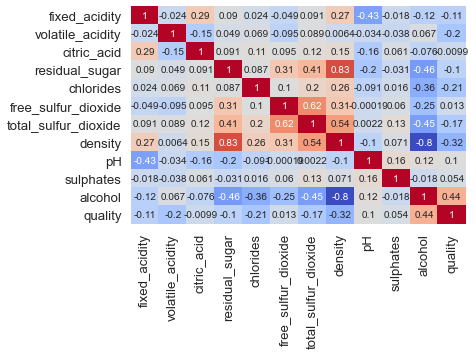

In [92]:
#HeatMap for correlation.

sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2g',  cbar=False)


In [93]:
# feature selection using variance threshold.

X = data.drop(columns = ['quality'])
var_threshold = VarianceThreshold(threshold=.3)
var_threshold.fit(X)
X_var_threshold = X.iloc[:,var_threshold.get_support()]

In [94]:
#shape and attributes after feature selection.

print(X_var_threshold.shape)
X_var_threshold.head()

(4896, 5)


,fixed_acidity,residual_sugar,free_sulfur_dioxide,total_sulfur_dioxide,alcohol
0,7.0,20.7,45.0,170.0,8.8
1,6.3,1.6,14.0,132.0,9.5
2,8.1,6.9,30.0,97.0,10.1
3,7.2,8.5,47.0,186.0,9.9
4,7.2,8.5,47.0,186.0,9.9


In [95]:
# features and target columns.

features = X_var_threshold
target = data['quality']

In [96]:
#split the transformed data into train and test datasets.

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.25,random_state=42,stratify = target)

In [97]:
# various classification techniques are used and model with best performance is selected as final model for prediction.
# pipeline is used for scaling and fit the classification model.

classification_techniques = [
    LogisticRegression(),
    KNeighborsClassifier(5),  
    DecisionTreeClassifier(),    
    GaussianNB(),
    RandomForestClassifier(n_estimators = 2000,max_depth = 3),
    BaggingClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(learning_rate = 0.3)]

for classifier_name in classification_techniques:
    pipeline = Pipeline([ ('scaler', StandardScaler()),('classifier_name', classifier_name)])
    pipeline.fit(X_train, Y_train)   
    print(classifier_name)
    print("Training model score: %.3f" % pipeline.score(X_train, Y_train))
    print("Testing model score: %.3f" % pipeline.score(X_test, Y_test))
    print("\n -----------------------------------------------------------------------------------")
    

LogisticRegression()
Training model score: 0.510
Testing model score: 0.511

 -----------------------------------------------------------------------------------
KNeighborsClassifier()
Training model score: 0.681
Testing model score: 0.497

 -----------------------------------------------------------------------------------
DecisionTreeClassifier()
Training model score: 1.000
Testing model score: 0.570

 -----------------------------------------------------------------------------------
GaussianNB()
Training model score: 0.469
Testing model score: 0.484

 -----------------------------------------------------------------------------------
RandomForestClassifier(max_depth=3, n_estimators=2000)
Training model score: 0.513
Testing model score: 0.510

 -----------------------------------------------------------------------------------
BaggingClassifier()
Training model score: 0.984
Testing model score: 0.590

 ---------------------------------------------------------------------------------

Based on above result we can see XGB Classifier gave us the best result. 

NOTE : if we make some changes to hyper parameters in random forest it also gives the best accuracy 
      but we need to make estimators as 5000, but this is taking quite long and taking most of system resources, 
      One more problem is random forest is overfitting the data and using grid search to find out best parameters also didnt
      work well. based on all this issues i am using XGB classifier as my model for prediction.


In [98]:
# XGB Classifier model tuning with parameters.
xgb_parameters = {
    "learning_rate" : [0.1,0.2,0.3,0.5,0.10],
    "max_depth" : [3,4,6,7,8,9],
    "min_child_weight" : [1,2,3,4,5,6],
    "gamma" : [0.0,0.1,0.2,0.3,0.4,0.8]
    }  

classifier_model = xgboost.XGBClassifier()
random_search = RandomizedSearchCV(classifier_model,param_distributions = xgb_parameters,cv = 3,verbose = 3)
random_search.fit(X_train,Y_train)

# listing out the best parameters.
random_search.best_params_

# finalizing the model and checking the accuracy again with best parameters.
model_final = XGBClassifier(min_child_weight = 3,
                            max_depth = 8,
                            learning_rate = 0.3,
                            gamma = 0.0,n_estimators=100)

#fitting the model with training data.
model_final.fit(X_train,Y_train)

#printing training and testing accuracy.
print("Training model score: %.3f" % model_final.score(X_train, Y_train))
print("Testing model score: %.3f" % model_final.score(X_test, Y_test))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] min_child_weight=4, max_depth=4, learning_rate=0.1, gamma=0.1 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_child_weight=4, max_depth=4, learning_rate=0.1, gamma=0.1, score=0.546, total=   0.7s
[CV] min_child_weight=4, max_depth=4, learning_rate=0.1, gamma=0.1 ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  min_child_weight=4, max_depth=4, learning_rate=0.1, gamma=0.1, score=0.538, total=   0.7s
[CV] min_child_weight=4, max_depth=4, learning_rate=0.1, gamma=0.1 ...


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  min_child_weight=4, max_depth=4, learning_rate=0.1, gamma=0.1, score=0.551, total=   0.7s
[CV] min_child_weight=1, max_depth=3, learning_rate=0.3, gamma=0.8 ...
[CV]  min_child_weight=1, max_depth=3, learning_rate=0.3, gamma=0.8, score=0.542, total=   0.5s
[CV] min_child_weight=1, max_depth=3, learning_rate=0.3, gamma=0.8 ...
[CV]  min_child_weight=1, max_depth=3, learning_rate=0.3, gamma=0.8, score=0.524, total=   0.5s
[CV] min_child_weight=1, max_depth=3, learning_rate=0.3, gamma=0.8 ...
[CV]  min_child_weight=1, max_depth=3, learning_rate=0.3, gamma=0.8, score=0.556, total=   0.5s
[CV] min_child_weight=4, max_depth=9, learning_rate=0.5, gamma=0.0 ...
[CV]  min_child_weight=4, max_depth=9, learning_rate=0.5, gamma=0.0, score=0.562, total=   1.3s
[CV] min_child_weight=4, max_depth=9, learning_rate=0.5, gamma=0.0 ...
[CV]  min_child_weight=4, max_depth=9, learning_rate=0.5, gamma=0.0, score=0.591, total=   1.3s
[CV] min_child_weight=4, max_depth=9, learning_rate=0.5, gamma=0.0 ..

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   30.4s finished


Training model score: 0.993
Testing model score: 0.621


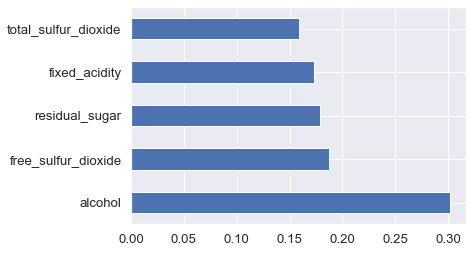

In [99]:
# feature importance visualization.

pd.Series(model_final.feature_importances_, index=X_train.columns).nlargest(5).plot(kind='barh')


The above graph shows the feature importance of attributes after feature selection. alcohol has more weight when compared to 
other attributes followed by free sulfur dioxide, residual sugar, fixed acidity and total sulfur dioxide has least weight. 

In [100]:
#predicting test dataset using XGB Classifier.
y_pred = model_final.predict(X_test)

#test accuracy
print(round(accuracy_score(Y_test,y_pred),2) * 100,"%")


62.0 %


In [101]:
#Confusion Matrix

print(confusion_matrix(Y_test,y_pred))


[[ 11  20  14   1   0]
 [  7 235 109  13   0]
 [  4 101 390  54   0]
 [  1  10  88 106  15]
 [  0   1  18   8  18]]


In [102]:
#classification report

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           4       0.48      0.24      0.32        46
           5       0.64      0.65      0.64       364
           6       0.63      0.71      0.67       549
           7       0.58      0.48      0.53       220
           8       0.55      0.40      0.46        45

    accuracy                           0.62      1224
   macro avg       0.58      0.50      0.52      1224
weighted avg       0.62      0.62      0.61      1224



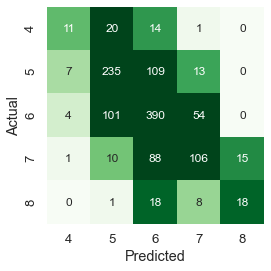

In [103]:
#confusion matrix.

data_cm = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(data_cm, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

sns.set(font_scale=1.2)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=20, square=True, fmt="d", cmap="Greens")

our test dataset has 
- 46 records of class 4 and we predicted 20 correctly. 
- 364 records of class 5 and 235 are predicted correctly.
- 549 records of class 6 and we predicted 390 records correctly. 
- 220 records of class 7 and 106 records are predicted correctly.
- 45 records of class 8 and we predicted 18 records correctly

# out of sample predictions.

In [104]:
# Looking at unique values of each column to generate new test data from mix and matching values.
for i in X_var_threshold.columns:
    print(X_var_threshold[ i ].unique())

[ 7.    6.3   8.1   7.2   6.2   8.6   7.9   6.6   8.3   7.4   6.5   6.4
  6.8   7.6   6.9   8.5   5.8   7.3   6.7   6.    7.1   6.1   7.5   9.8
  5.5   5.9   7.8   5.7   8.2   5.6   5.2   8.4  10.2   7.7   5.3   5.4
  9.1   5.    8.   10.    5.1   9.2   9.    8.8   8.7   4.8  10.3   9.4
  9.6   9.3   8.9   9.7  10.7   9.9   9.5  11.8   4.6   6.15  4.5   7.15
  6.45  4.2   4.9   4.7   3.8   4.4   3.9 ]
[20.7   1.6   6.9   8.5   7.    1.5   1.45  4.2   1.2  19.25  1.1   7.5
  2.9   1.7   1.3   9.    1.    8.7   2.   10.4   2.05 14.95  5.4  17.95
  2.5   7.4   1.4   4.4   5.    0.9  11.9  12.4   4.6   4.9   6.4   2.1
 10.1   7.8   4.8   8.8  16.    6.1   8.2  11.8  11.   13.3   1.8  15.9
 10.5  13.5   9.6  12.1  18.9  14.4  16.5  18.75  9.2   3.3   5.7  12.2
  6.85  7.6   2.8   2.7  13.1  15.8   8.1  15.7   1.9   2.2   4.3   5.2
  4.1   8.   10.2  14.   14.5  13.    2.4   8.95  9.85  0.8   4.55 17.7
  5.1  12.9   5.5  22.    9.4   3.8   3.6   3.5  16.1  13.2  13.9   2.3
 11.6   8.3   6.2 

In [105]:
#randomly selecting 5 values among unique values of all columns.

newdata = {
    
'fixed_acidity'             : [10.0,4.4,5.3,8.2,2.0,5.5],
'residual_sugar'            : [10.0,12.0,15.0,8.0,5.0,1.3],
'free_sulfur_dioxide'       : [13.0,33.5,87.6,100.2,120.5,30],
'total_sulfur_dioxide'      : [150.0,170.0,120.0,200.0,250.0,120],
'alcohol'                   : [2.0,4.0,6.0,8.0,10.0,13.5]
          }

In [106]:
# preparing dataframe.
df_test = pd.DataFrame(newdata)

In [107]:
# test data.
df_test

,fixed_acidity,residual_sugar,free_sulfur_dioxide,total_sulfur_dioxide,alcohol
0,10.0,10.0,13.0,150.0,2.0
1,4.4,12.0,33.5,170.0,4.0
2,5.3,15.0,87.6,120.0,6.0
3,8.2,8.0,100.2,200.0,8.0
4,2.0,5.0,120.5,250.0,10.0
5,5.5,1.3,30.0,120.0,13.5


In [108]:
#predicting the test dataset.

y_pred_testdata = model_final.predict(df_test)

In [109]:
#  predicted labels of testdata.

y_pred_testdata

array([4, 5, 6, 5, 4, 6], dtype=int64)

In [110]:
# printing quality of wine as per test data attributes.

for i,row in enumerate(y_pred_testdata):
    print("The prediction of record ",i+1,"is :",row)

The prediction of record  1 is : 4
The prediction of record  2 is : 5
The prediction of record  3 is : 6
The prediction of record  4 is : 5
The prediction of record  5 is : 4
The prediction of record  6 is : 6
